In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 1: Data Exploration and Cleaning

In [34]:
# Load datasets
user_interactions = pd.read_csv('user_interactions.csv')
purchase_data = pd.read_csv('purchase_data.csv')
website_performance = pd.read_csv('website_performance.csv')

In [35]:
# Check for missing values
print(user_interactions.isnull().sum())
print(purchase_data.isnull().sum())
print(website_performance.isnull().sum())


User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64
Purchase_ID           0
User_ID               0
Product_ID            0
Transaction_Amount    0
Purchase_Time         0
dtype: int64
Month              0
Page_Load_Time     0
Bounce_Rate        0
Conversion_Rate    0
dtype: int64


# Task 2: User Behavior Analysis

In [36]:

# Most visited pages and average time spent on each page
most_visited_pages = user_interactions['Page_Viewed'].value_counts().head(10)
average_time_spent = user_interactions.groupby('Page_Viewed')['Time_Spent_Seconds'].mean()

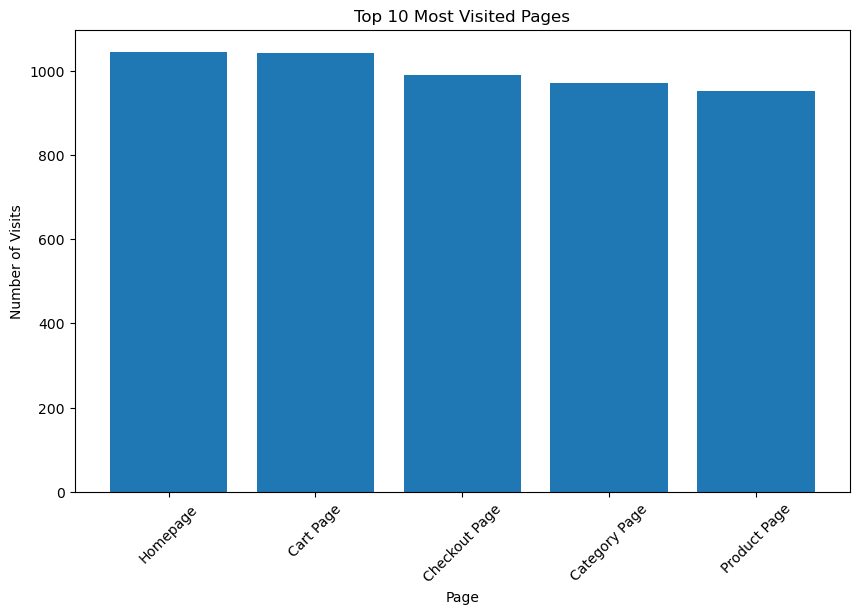

In [37]:
# Bar chart for most visited pages
plt.figure(figsize=(10, 6))
plt.bar(most_visited_pages.index, most_visited_pages.values)
plt.xlabel('Page')
plt.ylabel('Number of Visits')
plt.title('Top 10 Most Visited Pages')
plt.xticks(rotation=45)
plt.show()


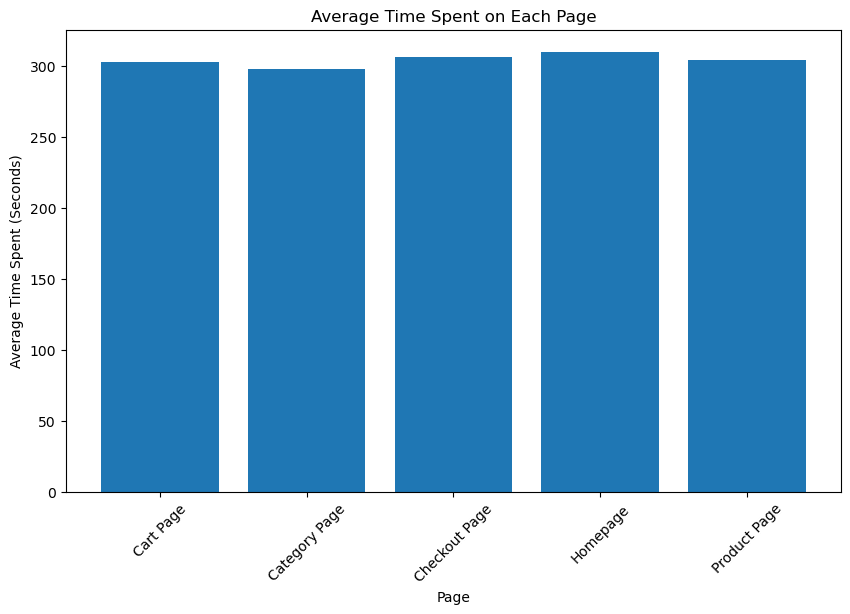

In [38]:
# Bar chart for average time spent on each page
plt.figure(figsize=(10, 6))
plt.bar(average_time_spent.index, average_time_spent.values)
plt.xlabel('Page')
plt.ylabel('Average Time Spent (Seconds)')
plt.title('Average Time Spent on Each Page')
plt.xticks(rotation=45)
plt.show()

# Task 3: Purchase Analysis

In [39]:
# Calculate the overall conversion rate for the website based on purchase data.
overall_conversion_rate = len(purchase_data) / len(user_interactions['User_ID'].unique())


In [40]:
# Identify the top-selling products and product categories.
top_selling_products = purchase_data['Product_ID'].value_counts().head(10)
top_product_categories = purchase_data['Product_ID'].value_counts().head(10)


In [41]:
# Explore the relationship between the number of interactions on the website and the likelihood of a purchase.
interaction_vs_purchase = user_interactions.merge(purchase_data, on='User_ID', how='left')
interaction_vs_purchase['Purchased'] = interaction_vs_purchase['Product_ID'].notnull()

In [42]:
# Calculate the likelihood of purchase based on the number of interactions
purchase_likelihood_by_interactions = interaction_vs_purchase.groupby('Page_Viewed')['Purchased'].mean()


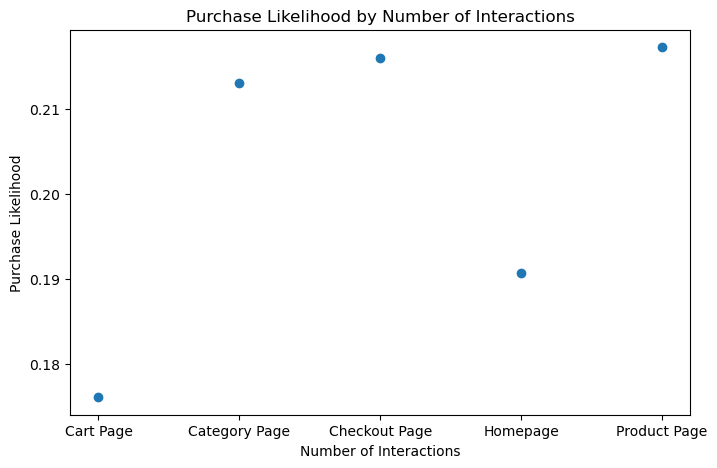

In [43]:
# Create a scatter plot for purchase likelihood by interactions
plt.figure(figsize=(8, 5))
plt.scatter(purchase_likelihood_by_interactions.index, purchase_likelihood_by_interactions.values)
plt.xlabel('Number of Interactions')
plt.ylabel('Purchase Likelihood')
plt.title('Purchase Likelihood by Number of Interactions')
plt.show()

# Task 4: Cohort Analysis

In [44]:
# Convert purchase dates to a proper datetime format
purchase_data['Purchase_Time'] = pd.to_datetime(purchase_data['Purchase_Time'])

In [45]:
# Extract the month and year from the first purchase to create cohorts
purchase_data['First_Purchase_Month'] = purchase_data.groupby('User_ID')['Purchase_Time'].transform('min').dt.to_period('M')

In [46]:
# Group users into cohorts based on their first purchase month
cohorts = purchase_data.groupby('First_Purchase_Month')['User_ID'].nunique()

In [47]:
# Convert Period objects to strings for the bar chart
cohorts_index_str = [str(cohort) for cohort in cohorts.index]

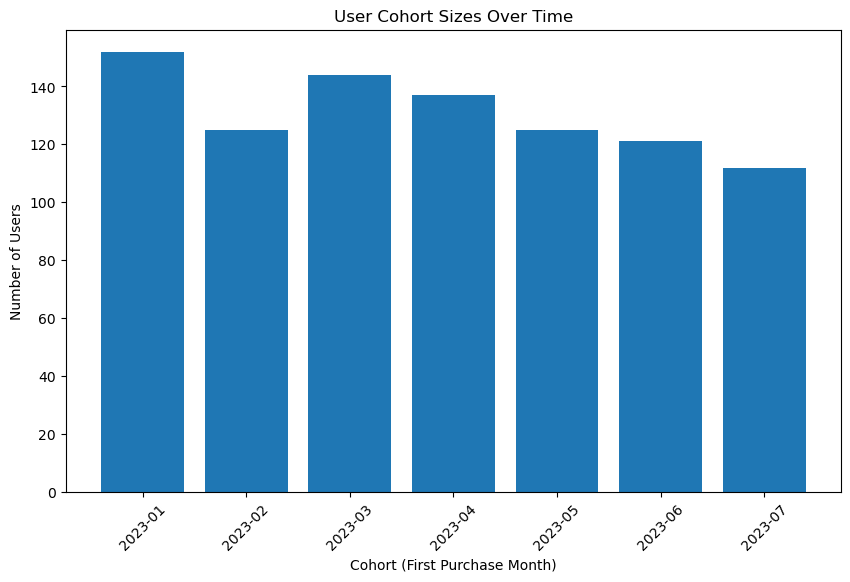

In [48]:
# Create a bar chart to visualize cohort sizes over time
plt.figure(figsize=(10, 6))
plt.bar(cohorts_index_str, cohorts.values)
plt.xlabel('Cohort (First Purchase Month)')
plt.ylabel('Number of Users')
plt.title('User Cohort Sizes Over Time')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Calculate the Lifetime Value (LTV) of customers acquired during different time periods
# Calculate the revenue generated by each cohort
cohort_revenue = purchase_data.groupby(['First_Purchase_Month'])['Transaction_Amount'].sum()

# Calculate the average revenue per user for each cohort
average_revenue_per_user = cohort_revenue / cohorts

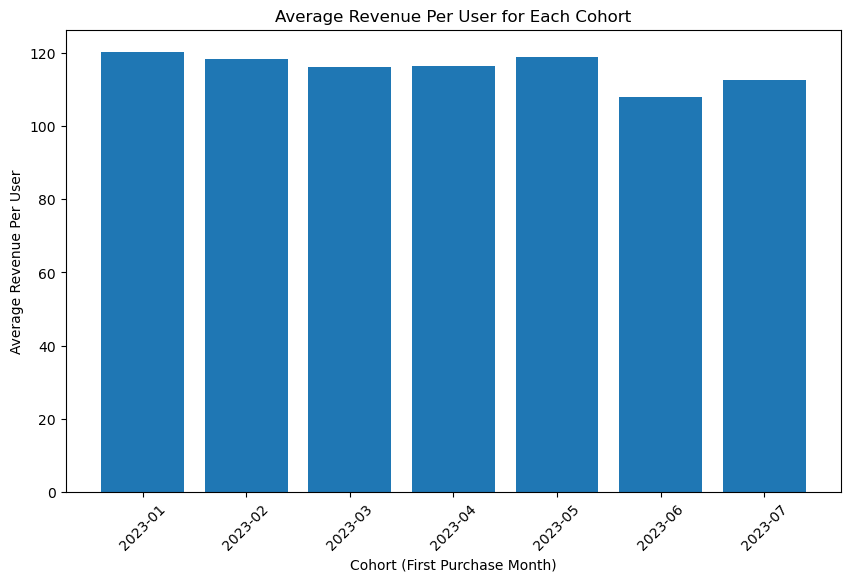

In [50]:
# Create a bar chart to visualize the average revenue per user for each cohort
plt.figure(figsize=(10, 6))
plt.bar(cohorts_index_str, average_revenue_per_user.values)
plt.xlabel('Cohort (First Purchase Month)')
plt.ylabel('Average Revenue Per User')
plt.title('Average Revenue Per User for Each Cohort')
plt.xticks(rotation=45)
plt.show()

# Task 5: Website Performance Analysis

In [51]:
# Analyze website performance metrics
average_page_load_time = website_performance['Page_Load_Time'].mean()
average_bounce_rate = website_performance['Bounce_Rate'].mean()
average_conversion_rate = website_performance['Conversion_Rate'].mean()


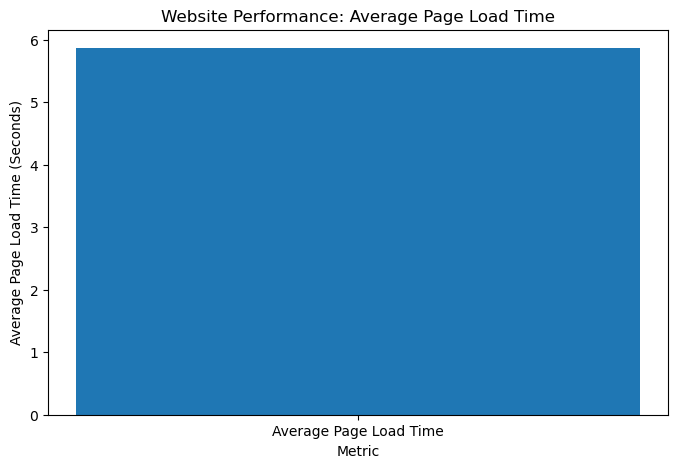

In [52]:
# Bar chart for average page load time
plt.figure(figsize=(8, 5))
plt.bar(['Average Page Load Time'], [average_page_load_time])
plt.xlabel('Metric')
plt.ylabel('Average Page Load Time (Seconds)')
plt.title('Website Performance: Average Page Load Time')
plt.show()

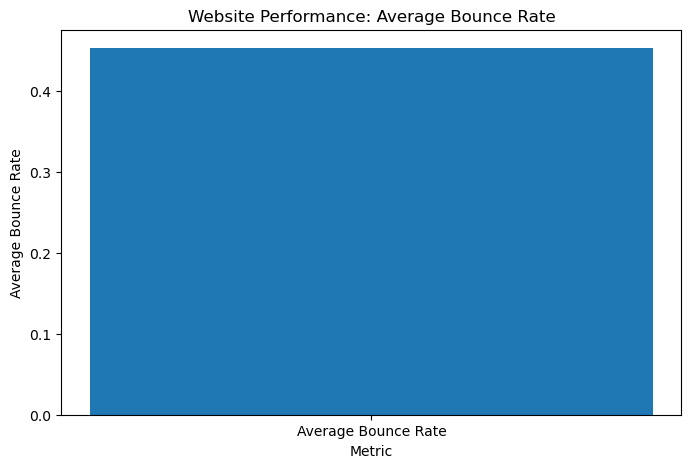

In [53]:
# Bar chart for average bounce rate
plt.figure(figsize=(8, 5))
plt.bar(['Average Bounce Rate'], [average_bounce_rate])
plt.xlabel('Metric')
plt.ylabel('Average Bounce Rate')
plt.title('Website Performance: Average Bounce Rate')
plt.show()

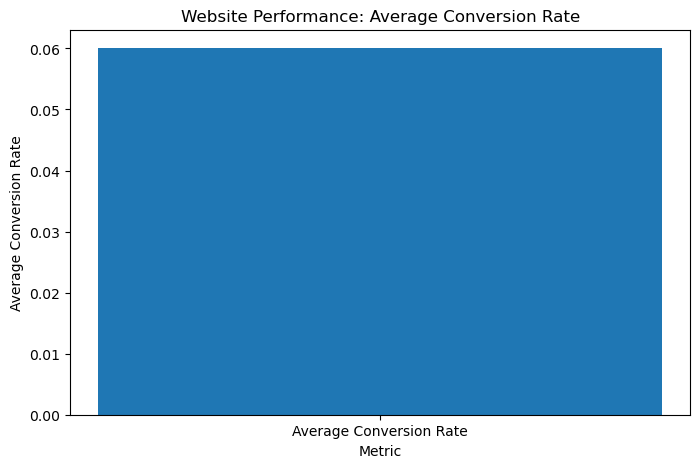

In [54]:
# Bar chart for average conversion rate
plt.figure(figsize=(8, 5))
plt.bar(['Average Conversion Rate'], [average_conversion_rate])
plt.xlabel('Metric')
plt.ylabel('Average Conversion Rate')
plt.title('Website Performance: Average Conversion Rate')
plt.show()